# TrendPulse

## Contributors:

contributors

## Required Libraries:

- pandas
- scikit-learn
- os
- ...

## Introduction:

(write an introduction to the project)
https://github.com/SamerEladad/TrendPulse

## Project Scope:

(write about project scope)

#### Import Libraries:

In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Research:

(write about the data research phase, web scraping and how we have come to the used dataset)

#### Import Data:

In [2]:
# Load the clean dataset
# Adjust file path as needed
df = pd.read_csv(r'/Users/samer/Documents/github_repos/TrendPulse/data/clean/Combined_Amazon_Dataset_Cleaned.csv')

#### Data Exploration:

In [4]:
# Display the first five rows of the dataset
df.head()

,name,main_category,sub_category,link,ratings,no_of_ratings,discount_price,actual_price
0,Bangalore Refinery 24k (999.9) 10 gm Yellow Go...,accessories,Jewellery,https://www.amazon.in/Bangalore-Refinery-999-9...,4.6,1186,64649.0,72800.0
1,Bangalore Refinery 24k (999.9) 2 gm Yellow Gol...,accessories,Jewellery,https://www.amazon.in/Bangalore-Refinery-999-9...,4.6,4392,13145.0,13200.0
2,Bangalore Refinery 999 Purity Silver Bar 1 Kg,accessories,Jewellery,https://www.amazon.in/Bangalore-Refinery-999-P...,4.3,218,73672.0,78000.0
3,Bangalore Refinery 999 Purity Silver Bar 500 Gram,accessories,Jewellery,https://www.amazon.in/Bangalore-Refinery-Purit...,4.4,231,37028.0,41000.0
4,Bangalore Refinery 999 Purity Silver Bar 100 Gram,accessories,Jewellery,https://www.amazon.in/Bangalore-Refinery-Purit...,4.5,837,7663.0,8500.0


In [5]:
# Print the columns of the dataframe
print(df.columns)

Index(['name', 'main_category', 'sub_category', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')


In [8]:
# Number of rows in the dataset
number_of_rows = df.shape[0]
print(f"Number of rows in the dataset: {number_of_rows}")

Number of rows in the dataset: 37049


In [7]:
# Printing the number of missing values in each column (is 0 because the data has already been cleaned)
missing_values = df.isnull().sum()
print(missing_values)

name              0
main_category     0
sub_category      0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64


In [10]:
# Print the column types of the cleaned dataset
column_types = df.dtypes
print(column_types)

name               object
main_category      object
sub_category       object
link               object
ratings           float64
no_of_ratings       int64
discount_price    float64
actual_price      float64
dtype: object


#### Data Cleaning:

(write about the data cleaning phase, examples:
- removed ',' and currency symbol in order to change the price to float
- removed products with missing values
- removed product image link column since it is not needed)

#### Data Visualization:

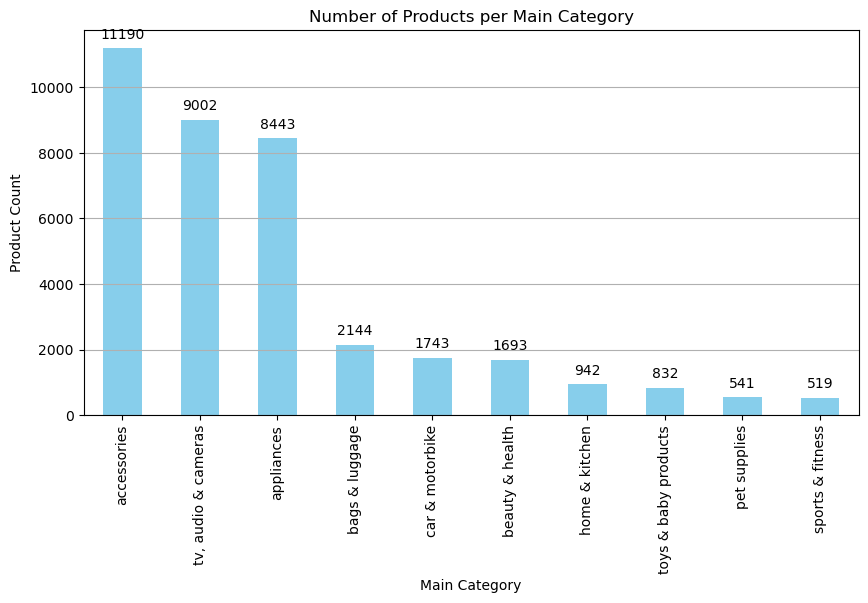

In [16]:
# Plotting the number of products per main category in the dataset
plt.figure(figsize=(10, 5))
ax = df['main_category'].value_counts(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Number of Products per Main Category')
plt.xlabel('Main Category')
plt.ylabel('Product Count')
plt.xticks(rotation=90)
plt.grid(axis='y')  # Adding grid lines on the y-axis

# Adding the number above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

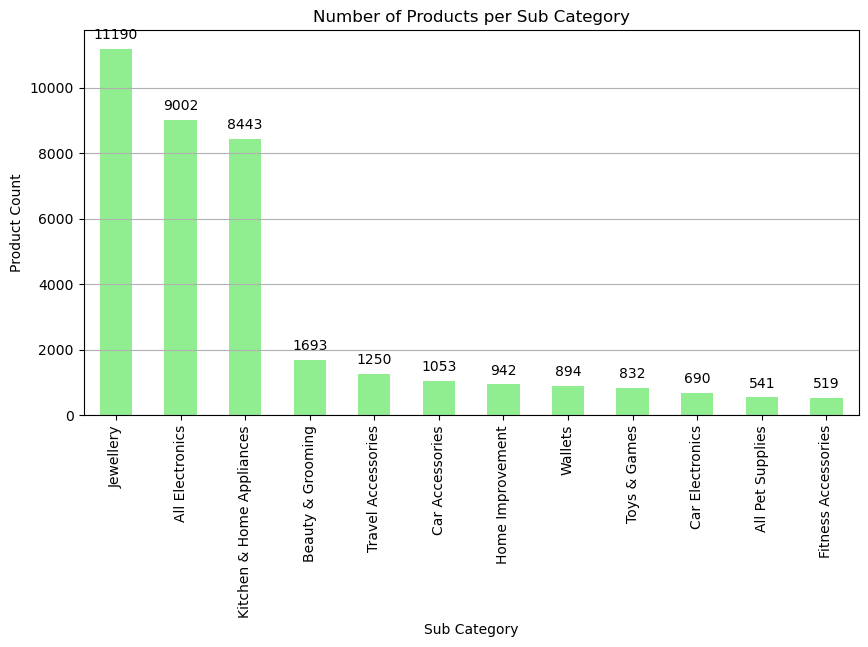

In [17]:
# Plotting the number of products per sub category in the dataset
plt.figure(figsize=(10, 5))
ax = df['sub_category'].value_counts(ascending=False).plot(kind='bar', color='lightgreen')
plt.title('Number of Products per Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Product Count')
plt.xticks(rotation=90)
plt.grid(axis='y')  # Adding grid lines on the y-axis

# Adding the number above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

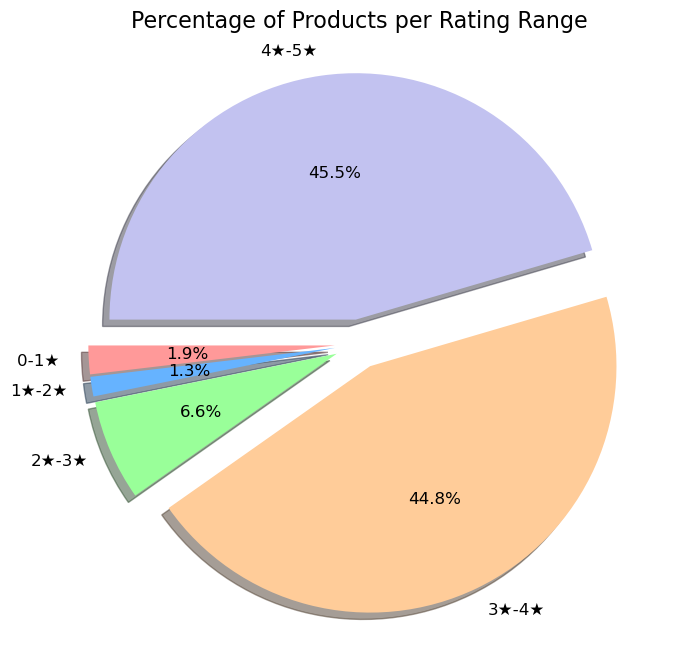

In [39]:
# Create bins for the rating ranges
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1★ ', '1★-2★', '2★-3★', '3★-4★', '4★-5★']
df['rating_range'] = pd.cut(df['ratings'], bins=bins, labels=labels, include_lowest=True)

# Plotting the number of products per rating range as a pie chart
plt.figure(figsize=(8, 8))
rating_counts = df['rating_range'].value_counts(sort=False)

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # Slightly explode all slices
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=colors, 
        explode=explode, shadow=True, startangle=180, textprops={'fontsize': 12})

plt.title('Percentage of Products per Rating Range', fontsize=16)
plt.show()

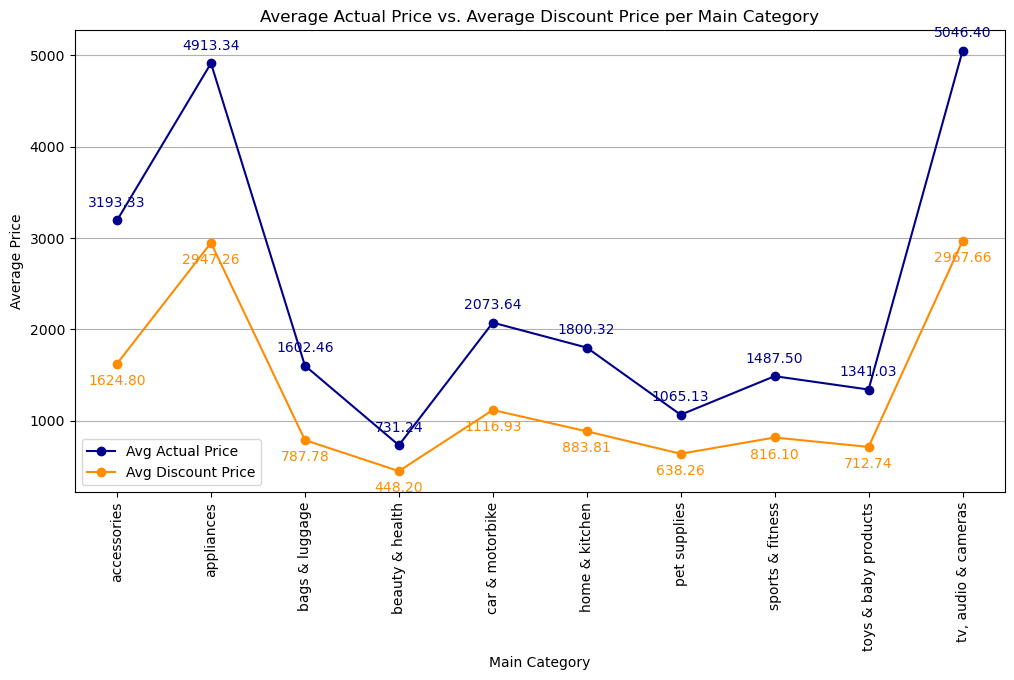

In [48]:
# Calculate the averages per main_category
avg_prices_main = df.groupby('main_category')[['actual_price', 'discount_price']].mean()

# Plotting
plt.figure(figsize=(12, 6))
categories = avg_prices_main.index

# Plotting the actual_price
plt.plot(categories, avg_prices_main['actual_price'], 'o-', label='Avg Actual Price', color='darkblue')

# Plotting the discount_price
plt.plot(categories, avg_prices_main['discount_price'], 'o-', label='Avg Discount Price', color='darkorange')

# Adding titles and labels
plt.title('Average Actual Price vs. Average Discount Price per Main Category')
plt.xlabel('Main Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(axis='y')  # Adding grid lines on the y-axis

# Adding legend
plt.legend()

# Adding the number above each point
for i, category in enumerate(categories):
    plt.annotate(f'{avg_prices_main["actual_price"].iloc[i]:.2f}', 
                 (category, avg_prices_main['actual_price'].iloc[i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', color='darkblue')
    plt.annotate(f'{avg_prices_main["discount_price"].iloc[i]:.2f}', 
                 (category, avg_prices_main['discount_price'].iloc[i]), 
                 textcoords="offset points", xytext=(0,-15), ha='center', color='darkorange')

# Display the plot
plt.show()

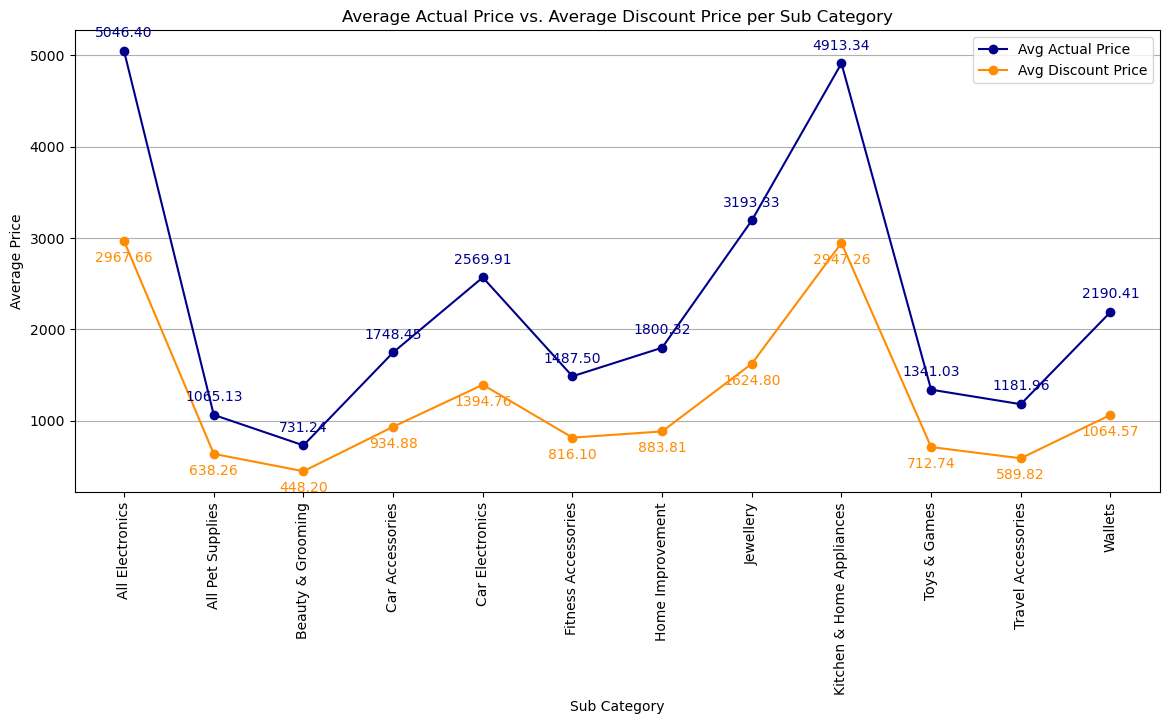

In [51]:
# Calculate the averages per sub_category
avg_prices_sub = df.groupby('sub_category')[['actual_price', 'discount_price']].mean()

# Plotting
plt.figure(figsize=(14, 6))
categories = avg_prices_sub.index

# Plotting the actual_price
plt.plot(categories, avg_prices_sub['actual_price'], 'o-', label='Avg Actual Price', color='darkblue')

# Plotting the discount_price
plt.plot(categories, avg_prices_sub['discount_price'], 'o-', label='Avg Discount Price', color='darkorange')

# Adding titles and labels
plt.title('Average Actual Price vs. Average Discount Price per Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(axis='y')  # Adding grid lines on the y-axis

# Adding legend
plt.legend()

# Adding the number above each point
for i, category in enumerate(categories):
    plt.annotate(f'{avg_prices_sub["actual_price"].iloc[i]:.2f}', 
                 (category, avg_prices_sub['actual_price'].iloc[i]), 
                 textcoords="offset points", xytext=(0,10), ha='center', color='darkblue')
    plt.annotate(f'{avg_prices_sub["discount_price"].iloc[i]:.2f}', 
                 (category, avg_prices_sub['discount_price'].iloc[i]), 
                 textcoords="offset points", xytext=(0,-15), ha='center', color='darkorange')

# Display the plot
plt.show()

## AI Model:

### Training & Validation:

code...

### Model Evaluation on Test Data:

code...

### Model Evaluation on User Input:

code...

## Results:

(write about our findings and what the output of our model looks like)

## Challenges:

(write about the challenges faced during this project)

## Key Learnings:

(write about our key learnings and take-aways from this project)